# 2.1) Analizando curvas de luz de Kepler

In [1]:
import kplr

/home/zapredfield/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


1.
La misión Kepler, lanzada en marzo del 2009, tiene como misión la busqueda de exoplanetas. Especificamente busca exoplanetas de tamaño similar a la tierra que esten dentro de la zona habitable, para así encontrar la fracción de estrellas que poseen planetas de este tipo y las caracteristicas principales de estas estrellas. Su espejo principal tiene 1.4 metros de diametro y trabaja dentro del visual e infrarojo.

Un acrónimo usado y que esta en este trabajo es KIC (Kepler Input Catalog) el cual es un número de identificación entregado a cada una de las estrellas observadas por la misión. Si una de estas estrellas posee indicios de un exoplaneta se le agrega una nueva identificación KOI(Kepler Object of Interest). 

Entonces por ejemplo una estrella podria tener KIC 2235750 y luego de que se encuentren exoplanetas en ella pasaría a ser KOI-465.

Luego de que Kepler perdiera parte de sus giroscopios, y por lo tanto su capacidad de apuntar con precisión, para "solucionar" esto se uso la presión producida por los fotones solares sobre el telescopio de modo de estabilizarlo. Esta segunda parte de la misión luego de la avería se llamó "K2 Second Light". Una de las limitaciones de este método es que la misión esta restringida a hacer observaciones en el plano en que orbita (ecliptica).  

Otro acrónimo usado luego de la misión K2 es EPIC (Ecliptic Plane Input Catalog), el cual tiene el mismo proposito que KIC pero, como indica su nombre, para objetos situados en el plano de la ecliptica. 

Los 3 objetos a estudiar son:

KIC 2305930

KIC 4348593

KIC 9469165

A continuación cargaremos los datos de estos:

In [2]:
#Asignamos las ID de KIC que queremos estudiar

client1 = kplr.API()
star1 = client1.star(2305930)

client2 = kplr.API()
star2 = client2.star(4348593)

client3 = kplr.API()
star3 = client3.star(9469165)

Para el análisis de curvas de luz nos interesa obtener los flujos, los errores de los flujos y los tiempos en que se obtuvo cada uno de estos.

In [3]:
#Utilizamos un método standard dado por Daniel Foreman-Mackey para obtener los datos

lcs1 = star1.get_light_curves()
#Descargamos los .fits con los datos para KIC 2305930

teff=[]
logg=[]
feh=[]


time1, flux1, ferr1 = [], [], []
for lc in lcs1:
    with lc.open() as f:

        hdu_data = f[1].data
        header=f[0].header
        time1.append(hdu_data["time"]) #obtenemos los tiempos
        flux1.append(hdu_data["pdcsap_flux"]) #flujos
        ferr1.append(hdu_data["pdcsap_flux_err"]) #errores de flujo
teff.append(header["TEFF"]) #cargamos la tempertaura efectiva 
logg.append(header["LOGG"])#cargamos la log(g)
feh.append(header["FEH"]) #cargamos la metalicidad
        
        
lcs2 = star2.get_light_curves()

time2, flux2, ferr2 = [], [], []
for lc in lcs2:
    with lc.open() as f:

        hdu_data = f[1].data
        header=f[0].header
        time2.append(hdu_data["time"])
        flux2.append(hdu_data["pdcsap_flux"])
        ferr2.append(hdu_data["pdcsap_flux_err"])
teff.append(header["TEFF"])
logg.append(header["LOGG"])
feh.append(header["FEH"])
        
lcs3 = star3.get_light_curves()

time3, flux3, ferr3 = [], [], []
for lc in lcs3:
    with lc.open() as f:

        hdu_data = f[1].data
        header=f[0].header
        time3.append(hdu_data["time"])
        flux3.append(hdu_data["pdcsap_flux"])
        ferr3.append(hdu_data["pdcsap_flux_err"])

teff.append(header["TEFF"])
logg.append(header["LOGG"])
feh.append(header["FEH"])        
        
        

Los header poseen información interesante como temperaturas, metalicidades y logaritmos de la gravedad:

In [4]:
print header.keys

<bound method Header.keys of SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2015-10-22'         / file creation date.                            
CREATOR = '1071457 FluxExporter2PipelineModule' / pipeline job and program used 
PROCVER = 'svn+ssh://murzim/repo/soc/tags/release/9.3.33 r60543' / SW version   
FILEVER = '6.1     '           / file format version                            

Existen varios tipos de fotometría por la cual se pueden obtener los flujos, dos de estas son, SAP(Simple Aperture Photometry) la cual contiene los datos de la fotometría de apertura pero sin mayor reducción de problemas, es decir, puede contener cuentas provenientes de otros cuerpos astrofísicos los cuales no son de interes. 

Por otro lado esta PDCSAP (Pre-search Data Conditioning Simple Aperture Photometry) el cual si incluye correciones a estos ruidos, luego es este útlimo el que se usará.

A continuación estan los parametros de Temperatura efectiva, log(g) y metalicidad para los 3 cuerpos:

In [5]:
teff1, logg1, feh1 = teff[0],logg[0],feh[0]
teff2, logg2, feh2 = teff[1],logg[1],feh[1]
teff3, logg3, feh3 = teff[2],logg[2],feh[2]

print "Estrella #2305930:","Teff:",teff1,"log(g):",logg1,"metalicidad [Fe/H]:",feh1
print "Estrella #4348593:","Teff:",teff2,"log(g):",logg2,"metalicidad [Fe/H]:",feh2
print "Estrella #9469165:","Teff:",teff3,"log(g):",logg3,"metalicidad [Fe/H]:",feh3

Estrella #2305930: Teff: 4891 log(g): 2.367 metalicidad [Fe/H]: -0.69
Estrella #4348593: Teff: 5065 log(g): 2.701 metalicidad [Fe/H]: 0.04
Estrella #9469165: Teff: 4997 log(g): 2.374 metalicidad [Fe/H]: -0.78


Los gráficos flujo vs tiempo se encuentran más abajo donde empezamos a trabajar con estos datos.

4.

Los flujos, errores y tiempos obtenidos previamente estan separados en distintas secciones o "quarters", cada quarter difiere en los flujos observados, esta diferencia no se debe a la estrella misma sino que a que las observaciones no se llevarón continuamente, lo que genera diferencias en los instrumentos y luego en los flujos.

Asumiendo que todos los flujos debiesen variar respecto a un mismo valor constante debemos normalizar cada quarter. Para esto simplemente se resto a cada quarter su media, de modo que se llevaron todos al rededor de flujo=0. 

Los gráficos de quarter y finales estan más adelante.

El procedimiento paso a paso que se llevo para normalizar los quarters fue:

-Eliminar todos los nans del flujo, error de flujo y eliminar los tiempos correspondientes para que las listas queden de dimensiones similares.

-Se unen los tiempos por concatenación de listas

-Se unen los errores por concatenación de listas

-A cada quarter del flujo se le resta su media respectiva y luego se concatenan en una sola lista.

Hecho esto se obtiene un flujo sobre el cual se puede trabajar.

In [6]:
#Para estrella 1
import matplotlib.pyplot as plt
import numpy


def nan(t,f,err): #Eliminar NANS
    tf=[]
    ff=[]
    errf=[]
    for i in range(0,len(f)):
        if numpy.isnan(f[i])==False:
            tf.append(t[i])
            ff.append(f[i])
            errf.append(err[i])
    return tf,ff,errf


def unirt(listas): #Función simple para unir listas
    final=[]
    for lista in listas:
        for dato in lista:
            final.append(dato)
    return final


def unirf(listas): #Función que resta las medias de cada quarter y une listas
    f=[]
    for lista in listas:
        mean=numpy.mean(lista)
        for dato in lista:
            f.append(dato-mean)
    return f


In [7]:
#Primer objeto
#Primero se remueven NANs
tsinnan=[]
fsinnan=[]
errsinnan=[]
for i in range(0,len(time1)):
    ttemp,ftemp,ferrtemp=nan(time1[i],flux1[i],ferr1[i])
    errsinnan.append(ferrtemp)
    tsinnan.append(ttemp)
    fsinnan.append(ftemp)   
    

t1=unirt(tsinnan) #Unimos quarters de tiempo
fprueba1=unirt(fsinnan) #unimos los flujos (sin normalizar)
f1=unirf(fsinnan) #unimos flujos normalizando
ferr1=unirt(errsinnan) #unimos quarters de error del flujo 




#Objeto 2
tsinnan=[]
fsinnan=[]
errsinnan=[]
for i in range(0,len(time2)):
    ttemp,ftemp,ferrtemp=nan(time2[i],flux2[i],ferr2[i])
    errsinnan.append(ferrtemp)
    tsinnan.append(ttemp)
    fsinnan.append(ftemp)   

t2=unirt(tsinnan)
fprueba2=unirt(fsinnan)
f2=unirf(fsinnan)
ferr2=unirt(errsinnan)
#Objeto 3
tsinnan=[]
fsinnan=[]
errsinnan=[]
for i in range(0,len(time3)):
    ttemp,ftemp,ferrtemp=nan(time3[i],flux3[i],ferr3[i])
    errsinnan.append(ferrtemp)
    tsinnan.append(ttemp)
    fsinnan.append(ftemp)   

t3=unirt(tsinnan)
fprueba3=unirt(fsinnan)
f3=unirf(fsinnan)
ferr3=unirt(errsinnan)


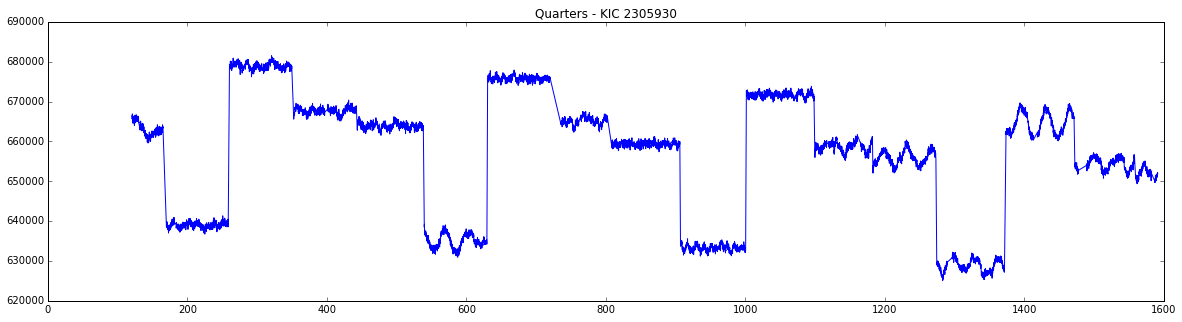

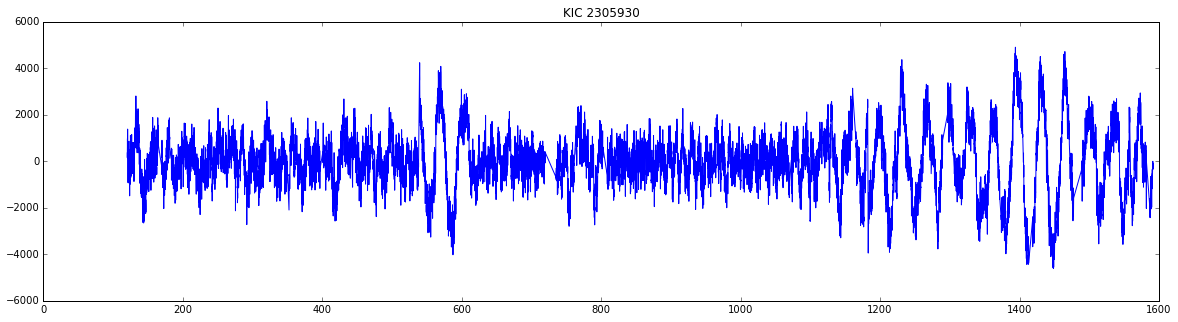

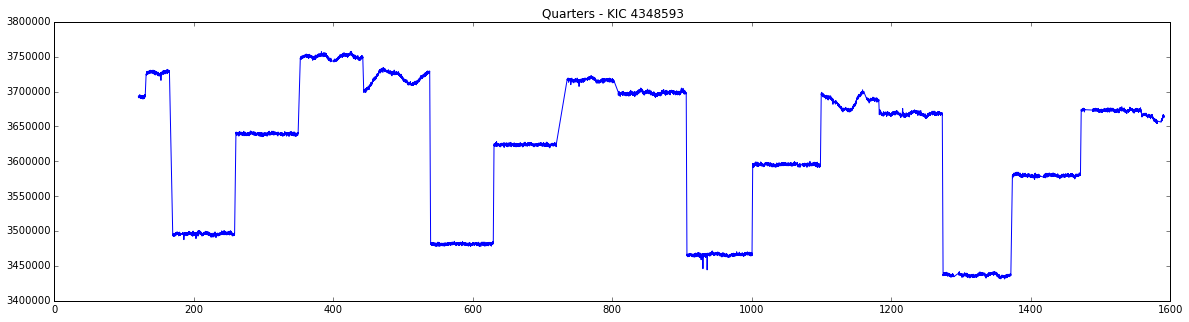

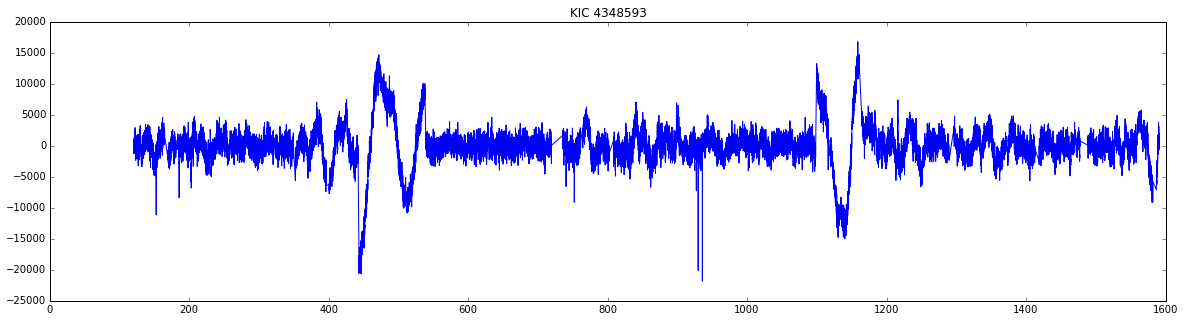

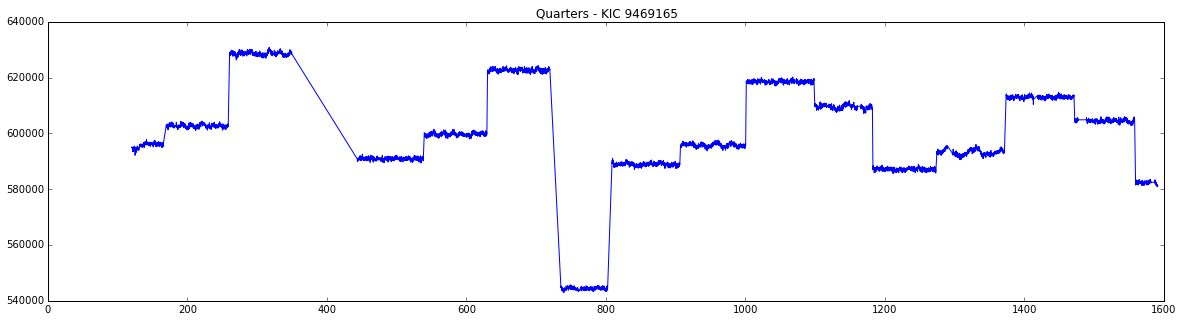

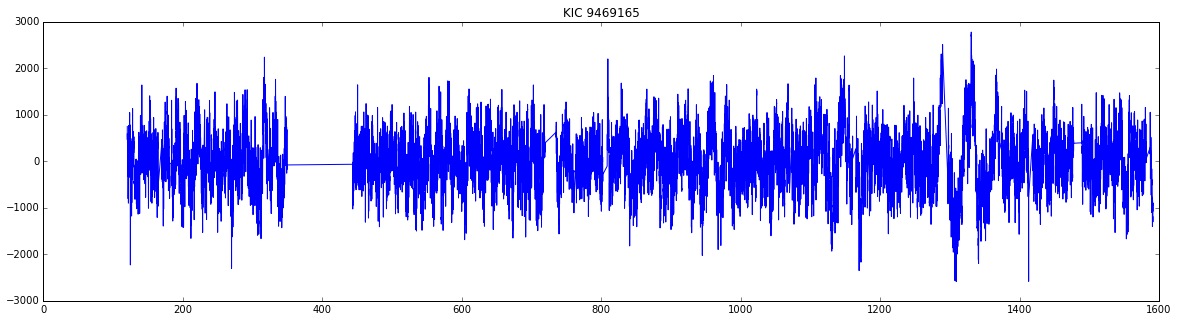

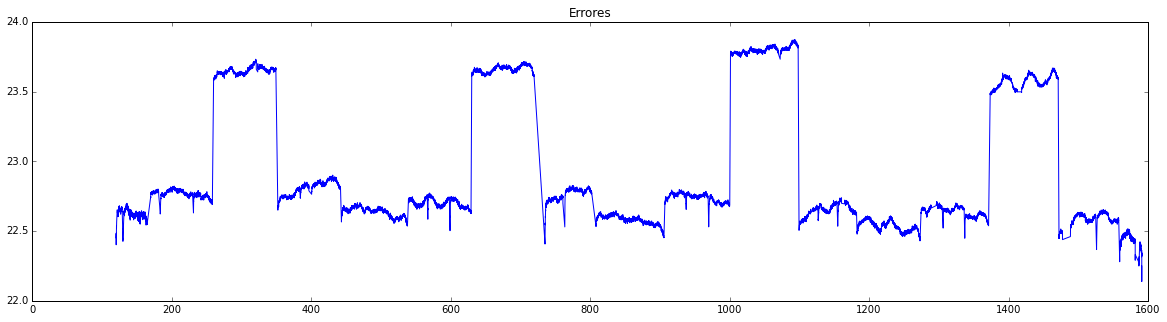

In [8]:
#Funciones de ploteo
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 5)
plt.title("Quarters - KIC 2305930")
plt.plot(t1,fprueba1)
plt.show()
plt.title("KIC 2305930")
plt.plot(t1,f1)
plt.show()

plt.title("Quarters - KIC 4348593")
plt.plot(t2,fprueba2)
plt.show()
plt.title("KIC 4348593")
plt.plot(t2,f2)
plt.show()

plt.title("Quarters - KIC 9469165")
plt.plot(t3,fprueba3)
plt.show()
plt.title("KIC 9469165")
plt.plot(t3,f3)
plt.show()

plt.title("Errores")
plt.plot(t1,ferr1)

Podemos ver los plots de los quarters sin normalizar y los de flujo normalizado(eliminación de discontinuidades).

A simple vista se nota que existe una variación periodica notable en el flujo, esta variación es importante ya que supera en más de un orden los errores obtenidos (23 cuentas aproximadamente).

5.

El siguiente pasó es llevar a cabo un periodograma de Lomb-Scargle, este consiste en ajustar una función de la forma $y(t)= a\cdot cos(wt) + b\cdot sin(wt) + c$, de modo de encontrar la curva con el mejor ajuste dado un periodo T, donde $w=\frac{2\pi}{T}$. Que tan bueno es se analiza con la función $\chi ^2$.

Dependiendo de que tan bueno es el ajuste se le entrega un valor normalizado entre 0 y 1, siendo 1 una similitud perfecta. A este valor se le llama "Lomb-Scargle Power"

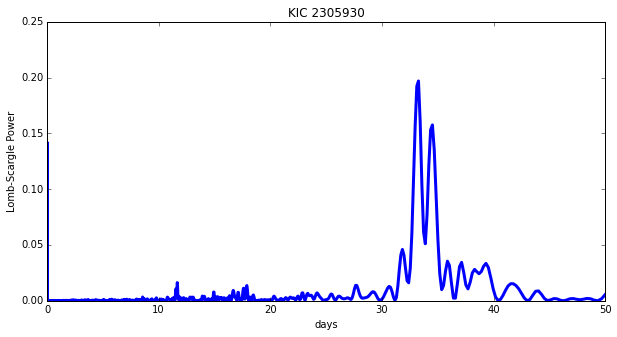

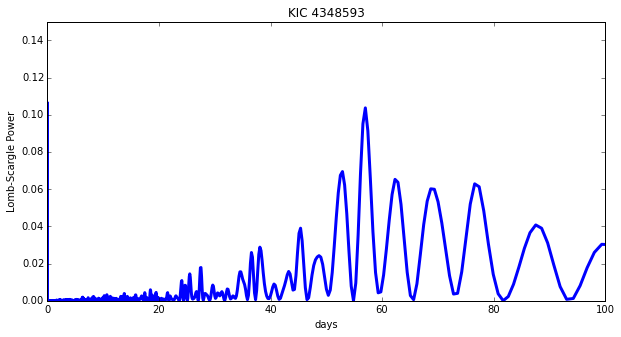

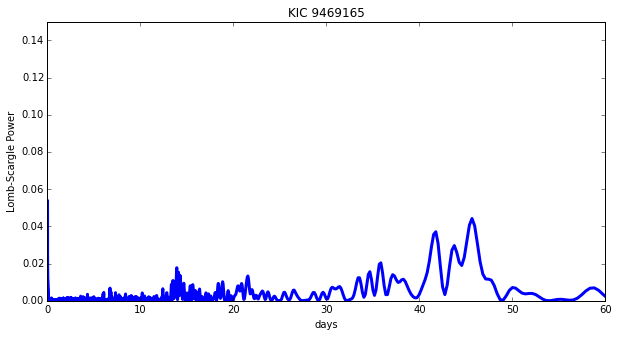

In [9]:
from gatspy.periodic import LombScargleFast


model = LombScargleFast().fit(t1,f1,ferr1)
periods, power = model.periodogram_auto(nyquist_factor=5)

plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(periods, power,linewidth=3)
plt.xlim(0,50)
plt.ylim(0,0.25)
plt.xlabel("days")
plt.ylabel("Lomb-Scargle Power")
plt.title("KIC 2305930")
plt.show()




model2 = LombScargleFast().fit(t2,f2,ferr2)
periods2, power2 = model2.periodogram_auto(nyquist_factor=10)

plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(periods2, power2,linewidth=3)
plt.xlim(0,100)
plt.ylim(0,0.15)
plt.xlabel("days")
plt.ylabel("Lomb-Scargle Power")
plt.title("KIC 4348593")
plt.show()


model3 = LombScargleFast().fit(t3,f3,ferr3)
periods3, power3 = model3.periodogram_auto(nyquist_factor=10)

plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(periods3, power3,linewidth=3)
plt.xlim(0,60)
plt.ylim(0,0.15)
plt.xlabel("days")
plt.ylabel("Lomb-Scargle Power")
plt.title("KIC 9469165")
plt.show()


In [10]:
#Le damos un rango de periodos en el cual luego debe encontrar el mejor
model.optimizer.period_range=(5, 100)
model2.optimizer.period_range=(5, 100)
model3.optimizer.period_range=(5, 100)

In [11]:
p1 = model.best_period
p2 = model2.best_period
p3 = model3.best_period

Finding optimal frequency:
 - Estimated peak width = 0.00427
 - Using 5 steps per peak; omega_step = 0.000855
 - User-specified period range:  5 to 1e+02
 - Computing periods at 1398 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Finding optimal frequency:
 - Estimated peak width = 0.00427
 - Using 5 steps per peak; omega_step = 0.000855
 - User-specified period range:  5 to 1e+02
 - Computing periods at 1398 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Finding optimal frequency:
 - Estimated peak width = 0.00427
 - Using 5 steps per peak; omega_step = 0.000855
 - User-specified period range:  5 to 1e+02
 - Computing periods at 1398 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


La lista de los mejores periodos para el ajuste estan abajo:

In [12]:
print "Periodo #2305930:",p1,"days"
print "Periodo #4348593:",p2,"days"
print "Periodo #9469165:",p3,"days"

Periodo #2305930: 33.2138044244 days
Periodo #4348593: 56.9403197727 days
Periodo #9469165: 45.6628130614 days


Como vimos antes, estas son los parametros entregados por KIC.

In [13]:
print "Estrella #2305930:","Teff:",teff1,"log(g):",logg1,"metalicidad [Fe/H]:",feh1
print "Estrella #4348593:","Teff:",teff2,"log(g):",logg2,"metalicidad [Fe/H]:",feh2
print "Estrella #9469165:","Teff:",teff3,"log(g):",logg3,"metalicidad [Fe/H]:",feh3

Estrella #2305930: Teff: 4891 log(g): 2.367 metalicidad [Fe/H]: -0.69
Estrella #4348593: Teff: 5065 log(g): 2.701 metalicidad [Fe/H]: 0.04
Estrella #9469165: Teff: 4997 log(g): 2.374 metalicidad [Fe/H]: -0.78


En cuanto a los del articulo de asterosismología:



In [14]:
param=[((4716,107),(-0.59,0.08), (2.367,0.014),str(0)),((5018,82), (0.04,0.05), (2.707,0.02),str(1)),((4806,110), (-0.66,0.08), (2.375,0.013),str(2))]

print "Estrella #2305930:","Teff:",4716,"log(g):",2.367,"metalicidad [Fe/H]:",-0.59
print "Estrella #4348593:","Teff:",5018,"log(g):",2.707,"metalicidad [Fe/H]:",0.04
print "Estrella #9469165:","Teff:",4806,"log(g):",2.375,"metalicidad [Fe/H]:",-0.66

Estrella #2305930: Teff: 4716 log(g): 2.367 metalicidad [Fe/H]: -0.59
Estrella #4348593: Teff: 5018 log(g): 2.707 metalicidad [Fe/H]: 0.04
Estrella #9469165: Teff: 4806 log(g): 2.375 metalicidad [Fe/H]: -0.66


Usando los parametros de asterosismología y isochrones, se obtienen los siguientes valores de edad (log(age)), masa (Solar mass) y radio (Solar radius).

In [15]:
from isochrones import StarModel
from isochrones.dartmouth import Dartmouth_Isochrone

def parametros(param):
    dar = Dartmouth_Isochrone()
    model  = StarModel(dar, Teff=param[0], logg=param[2], feh=param[1])
    name="chains"+param[3]+"/single-"
    model.fit(basename=name)
    model.plot_samples(prop="age")
    model.plot_samples(prop="mass")
    model.plot_samples(prop="radius")

# KIC 2305930

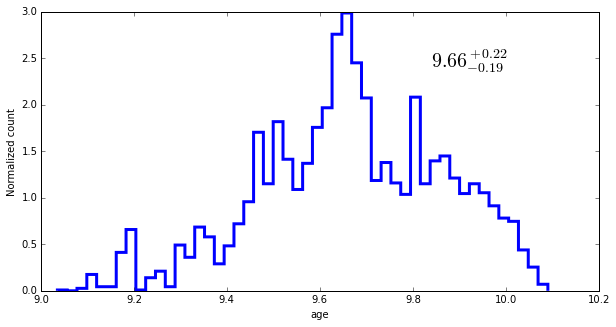

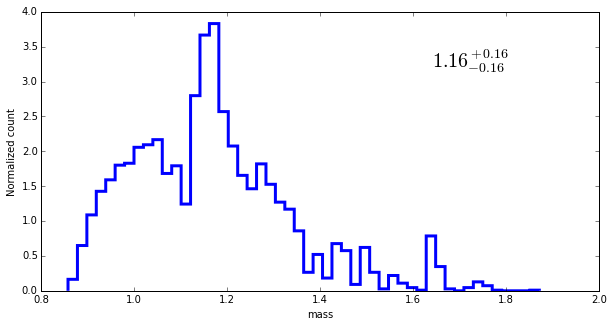

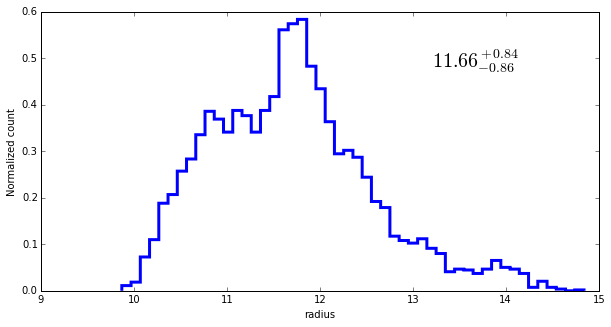

In [16]:
parametros(param[0])

# KIC 4348593

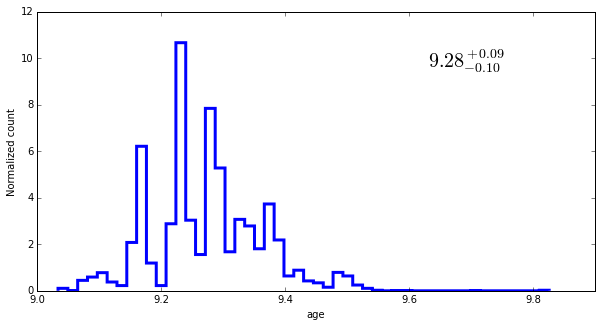

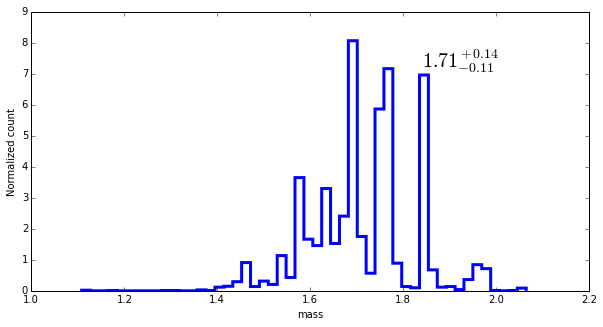

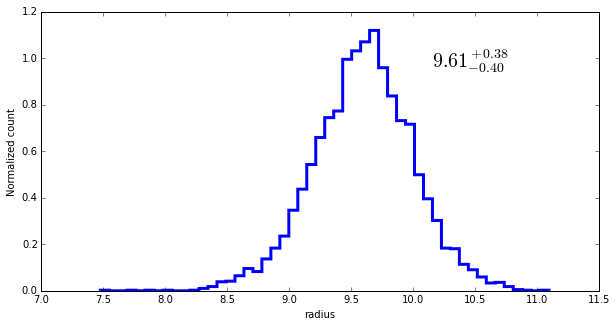

In [17]:
parametros(param[1])

# KIC 9469165

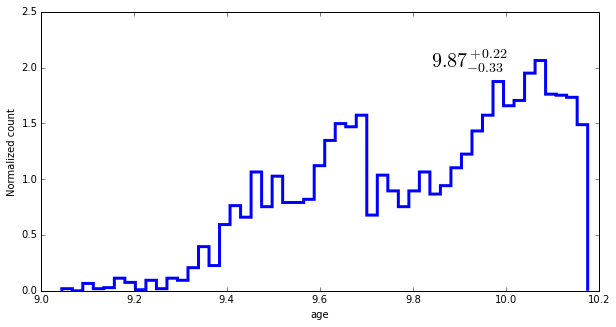

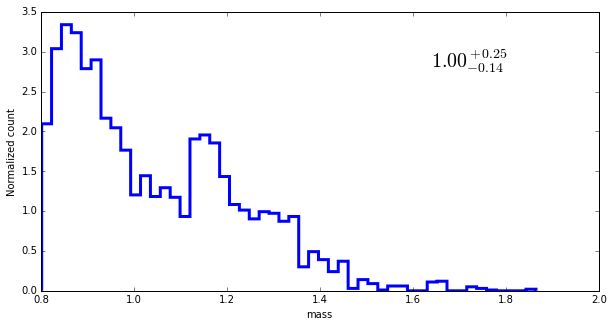

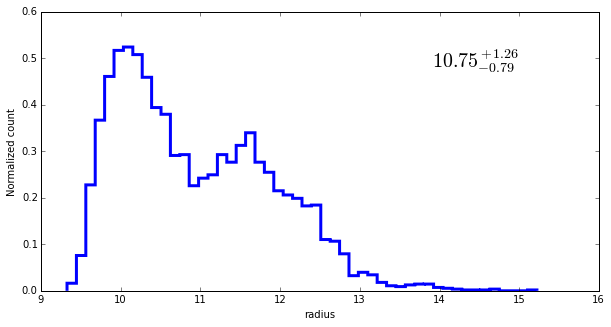

In [18]:
parametros(param[2])

Vistos estos radios, es claro que son estrellas gigantes con masas cercanas a la Solar.

In [19]:
import numpy as np
def flujovsfase(t,f,ferr,p,name):
    fase = (t/p) % 4
    model = LombScargleFast().fit(t,f,ferr)
    x = np.linspace(0, 4, 100)
    y = model.predict(p*x, period=p)
    fig, ax = plt.subplots()
    plt.title(name)
    ax.errorbar(fase, f, ferr, fmt='.k', ecolor='gray', alpha=0.2)
    ax.set(xlabel='Phase', ylabel='magitude')
    ax.invert_yaxis();
    ax.plot(x, y, lw=3)

    
def flujovsfaseRRab(t,f,ferr,p,name):
    fase = (t/p) % 4
    model = LombScargleFast().fit(t,f,ferr)
    x = np.linspace(0, 4, 100)
    y = model.predict(p*x, period=p)
    fig, ax = plt.subplots()
    plt.title(name)
    ax.errorbar(fase, f, ferr, fmt='.k', ecolor='gray', alpha=0.2)
    ax.set(xlabel='Phase', ylabel='magitude')
    ax.invert_yaxis();

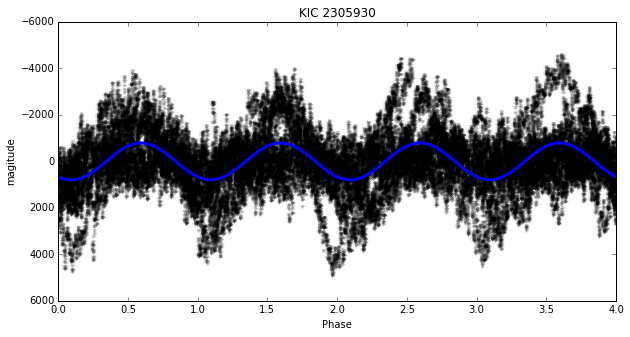

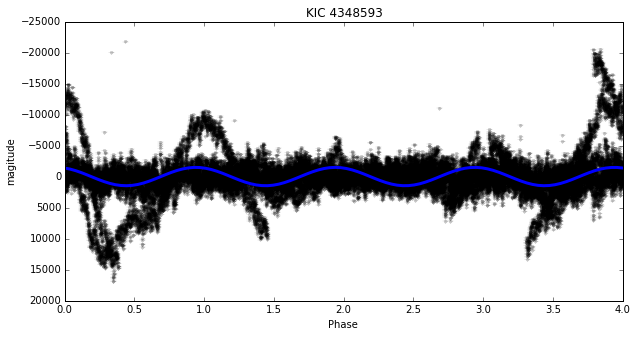

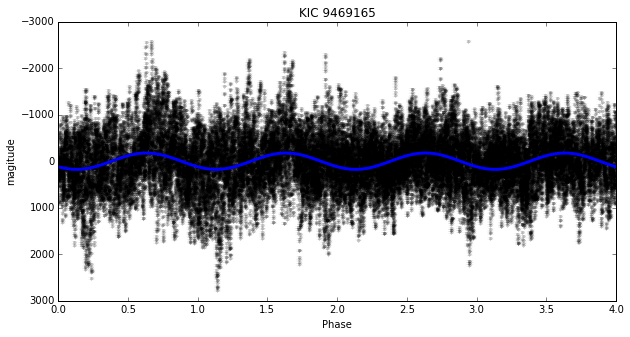

In [20]:
flujovsfase(t1,f1,ferr1,p1,"KIC 2305930")
flujovsfase(t2,f2,ferr2,p2,"KIC 4348593")
flujovsfase(t3,f3,ferr3,p3,"KIC 9469165")

Para la primera estrella se puede ver que existe una periodicidad más notable, pero en las otras dos no se ve una correspondencia con una función sinusoidal del periodo encontrado.

Las variabilidades de estas tres estrellas estan dadas por una combinación de rotación y manchas solares de estas, debido a que los distintas zonas de la estrella tienen distinta cantidad de manchas solares, lo cual se traduce en un flujo variable, 

# RRab



A continuación haremos el mismo estudio de variabilidad pero para una estrella RRab.

La estrella a analizar es KIC 3733346, obtenida de Nemec et al (https://arxiv.org/pdf/1106.6120v1.pdf).

In [21]:
import matplotlib.pyplot as plt
clientl = kplr.API()
lyrae = clientl.star(3733346)
lcs = lyrae.get_light_curves()

In [22]:
time, flux, ferr = [], [], []
for lc in lcs:
    with lc.open() as f:

        hdu_data = f[1].data
        time.append(hdu_data["time"]) #obtenemos los tiempos
        flux.append(hdu_data["pdcsap_flux"]) #flujos
        ferr.append(hdu_data["pdcsap_flux_err"]) #errores de flujo
        
print len(time)

18


In [23]:
tsinnan=[]
fsinnan=[]
errsinnan=[]
for i in range(0,len(time)):
    ttemp,ftemp,ferrtemp=nan(time[i],flux[i],ferr[i])
    errsinnan.append(ferrtemp)
    tsinnan.append(ttemp)
    fsinnan.append(ftemp)   

t=unirt(tsinnan)
fprueba=unirt(fsinnan)
f=unirf(fsinnan)
ferr=unirt(errsinnan)

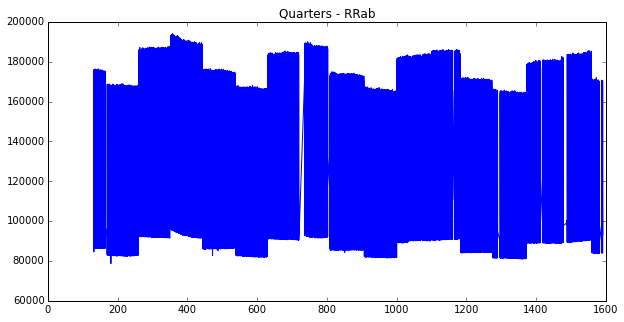

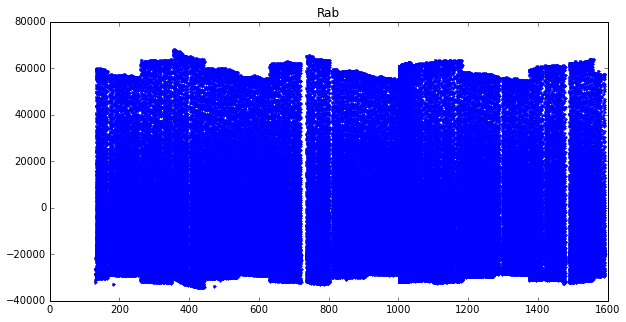

In [24]:
plt.title("Quarters - RRab")
plt.plot(t,fprueba)
plt.show()
plt.title("Rab")
plt.plot(t,f,".")
plt.show()

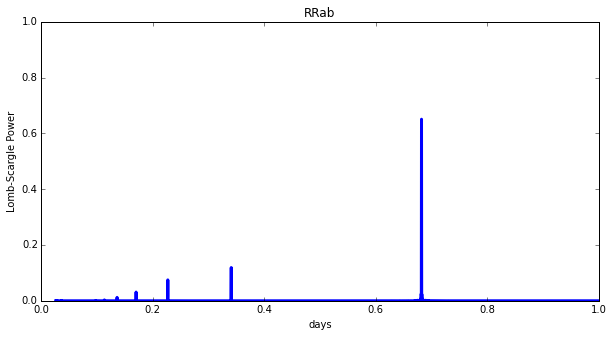

In [25]:
model = LombScargleFast().fit(t,f,ferr)
periods, power = model.periodogram_auto(nyquist_factor=1)

plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(periods, power,linewidth=3)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("days")
plt.ylabel("Lomb-Scargle Power")
plt.title("RRab")
plt.show()

In [26]:
model.optimizer.period_range=(0.1, 1)

In [27]:
p = model.best_period

Finding optimal frequency:
 - Estimated peak width = 0.00431
 - Using 5 steps per peak; omega_step = 0.000861
 - User-specified period range:  0.1 to 1
 - Computing periods at 65679 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


In [28]:
print "Periodo:",p,"days"

Periodo: 0.682025546838 days


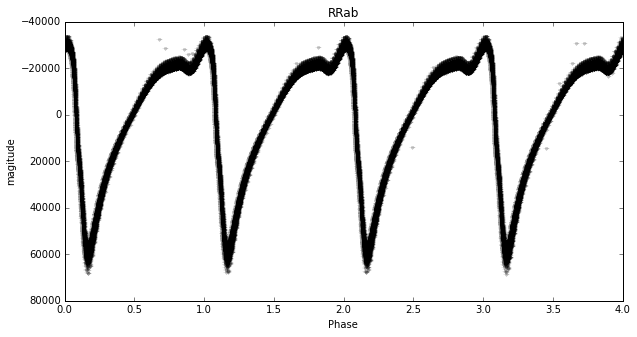

In [29]:
flujovsfaseRRab(t,f,ferr,p,"RRab")


Para este caso esta más que claro que existe una variabilidad en la estrella. Esta es una de las cualidades por las que son conocidas las RR Lyrae y se debe a su pulsación.